# **1. Perkenalan Dataset**


1. **Sumber Dataset**:  
   Dataset ini diperoleh dari Kaggle dengan judul **Python Learning & Exam Performance Dataset** dan link https://www.kaggle.com/datasets/emonsharkar/python-learning-and-exam-performance-dataset
2. **Overview Dataset**:<br>
   Dataset ini berisi data simulasi aktivitas belajar dari 3000 murid yang sedang belajar Python. Beberapa arti kolom dalam dataset ini diantaranya :
   - age (Umur)
   - country (Negara asal)
   - prior_programming_experience (Level pengalaman murid *sebelum* belajar Python)
   - weeks_in_course (Berapa minggu murid telah belajar Python)
   - hours_spent_learning_per_week (Rata-rata jam yang dihabiskan untuk belajar Python per minggu)
   - practice_problems_solved (Jumlah coding challenge yang terselesaikan)
   - projects_completed (Jumlah projek Python yang terselesaikan)
   - tutorial_videos_watched (Jumlah video tutorial Python yang ditonton)
   - uses_kaggle (Apakah murid menggunakan Kaggle atau tidak)
   - participates_in_discussion_forums (Apakah murid berpartisipasi dalam forum atau tidak)
   - debugging_sessions_per_week (Rat-rata frekuensi murid melakukan debugging per minggu)
   - self_reported_confidence_python (Confidence dalam penggunaan Python dalam skala 1-10)
   - final_exam_score (Skor ujian akhir rentang 0-100)
   - passed_exam (Status kelulusan murid dalam binary)



# **2. Import Library**

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

In [9]:
df_raw = pd.read_csv('python-learning-performance_raw.csv')
df_raw

,student_id,age,country,prior_programming_experience,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
0,1,54,Pakistan,Beginner,12,12.2,60,1,24,0,1,4,10,53.8,0
1,2,44,Nigeria,NaN,15,14.2,52,1,32,0,0,5,7,31.9,0
2,3,30,India,Intermediate,5,7.7,71,1,43,0,0,6,3,59.4,0
3,4,23,Nigeria,Beginner,4,5.6,64,2,40,1,0,3,10,58.8,0
4,5,36,UK,NaN,3,3.5,62,1,47,1,0,3,7,24.8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,39,Brazil,NaN,1,9.3,60,2,41,1,1,4,4,27.9,0
2996,2997,34,Indonesia,Intermediate,6,5.8,63,2,35,0,0,3,3,41.9,0
2997,2998,52,Pakistan,Beginner,3,1.4,63,2,45,1,1,7,7,26.9,0
2998,2999,54,Pakistan,Intermediate,5,8.5,51,2,35,1,0,4,2,27.8,0


# **4. Exploratory Data Analysis (EDA)**

In [10]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 15 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   student_id                         3000 non-null   int64  
 1   age                                3000 non-null   int64  
 2   country                            3000 non-null   object 
 3   prior_programming_experience       1938 non-null   object 
 4   weeks_in_course                    3000 non-null   int64  
 5   hours_spent_learning_per_week      3000 non-null   float64
 6   practice_problems_solved           3000 non-null   int64  
 7   projects_completed                 3000 non-null   int64  
 8   tutorial_videos_watched            3000 non-null   int64  
 9   uses_kaggle                        3000 non-null   int64  
 10  participates_in_discussion_forums  3000 non-null   int64  
 11  debugging_sessions_per_week        3000 non-null   int64

In [11]:
df_raw.describe()

,student_id,age,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,final_exam_score,passed_exam
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,35.327000,8.121000,7.035267,59.983667,2.001333,39.896667,0.400667,0.498333,4.973333,5.566000,43.318267,0.177333
std,866.169729,11.302182,4.275019,2.936134,7.713056,1.395701,6.263258,0.490115,0.500081,2.236729,2.885207,17.376666,0.382014
min,1.000000,16.000000,1.000000,0.000000,35.000000,0.000000,19.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,750.750000,26.000000,5.000000,5.000000,55.000000,1.000000,35.000000,0.000000,0.000000,3.000000,3.000000,30.900000,0.000000
50%,1500.500000,36.000000,8.000000,7.000000,60.000000,2.000000,40.000000,0.000000,0.000000,5.000000,6.000000,43.100000,0.000000
75%,2250.250000,45.000000,12.000000,9.000000,65.000000,3.000000,44.000000,1.000000,1.000000,6.000000,8.000000,55.600000,0.000000
max,3000.000000,54.000000,15.000000,17.100000,87.000000,9.000000,63.000000,1.000000,1.000000,17.000000,10.000000,100.000000,1.000000


In [12]:
print("Jumlah Nilai Null Tiap Kolom: \n", df_raw.isnull().sum())

Jumlah Nilai Null Tiap Kolom: 
 student_id                              0
age                                     0
country                                 0
prior_programming_experience         1062
weeks_in_course                         0
hours_spent_learning_per_week           0
practice_problems_solved                0
projects_completed                      0
tutorial_videos_watched                 0
uses_kaggle                             0
participates_in_discussion_forums       0
debugging_sessions_per_week             0
self_reported_confidence_python         0
final_exam_score                        0
passed_exam                             0
dtype: int64


In [13]:
print("Jumlah Nilai Duplikat:", df_raw.duplicated().sum())

Jumlah Nilai Duplikat: 0


In [14]:
# melihat nilai unik pada kolom kategorikal
print("Label Unik Kolom country : ", df_raw['country'].unique())
print("\nLabel Unik Kolom prior_programming_experience : ", df_raw['prior_programming_experience'].unique())

Label Unik Kolom country :  ['Pakistan' 'Nigeria' 'India' 'UK' 'Brazil' 'USA' 'Bangladesh' 'Germany'
 'Indonesia' 'Other']

Label Unik Kolom prior_programming_experience :  ['Beginner' nan 'Intermediate' 'Advanced']


In [15]:
# deteksi outlier pada kolom numerikal
# passed_exam, participates_in_discussion_forums dan uses_kaggle tidak termasuk karena bertipe boolean
# student_id tidak termasuk karena merupakan identifier, jadi tdk relevan
numeric_cols = df_raw.select_dtypes(include=['float64', 'int64']).drop(columns=['student_id', 'participates_in_discussion_forums', 'passed_exam', 'uses_kaggle']).columns
outlier_summary = []

for col in numeric_cols:
    Q1 = df_raw[col].quantile(0.25)
    Q3 = df_raw[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = df_raw[(df_raw[col] < lower_bound) | (df_raw[col] > upper_bound)].shape[0]
    outlier_summary.append({'Kolom': col, 'Jumlah Outlier': outlier_count})

outlier_df = pd.DataFrame(outlier_summary)
display(outlier_df)

,Kolom,Jumlah Outlier
0,age,0
1,weeks_in_course,0
2,hours_spent_learning_per_week,10
3,practice_problems_solved,25
4,projects_completed,17
5,tutorial_videos_watched,15
6,debugging_sessions_per_week,39
7,self_reported_confidence_python,0
8,final_exam_score,8


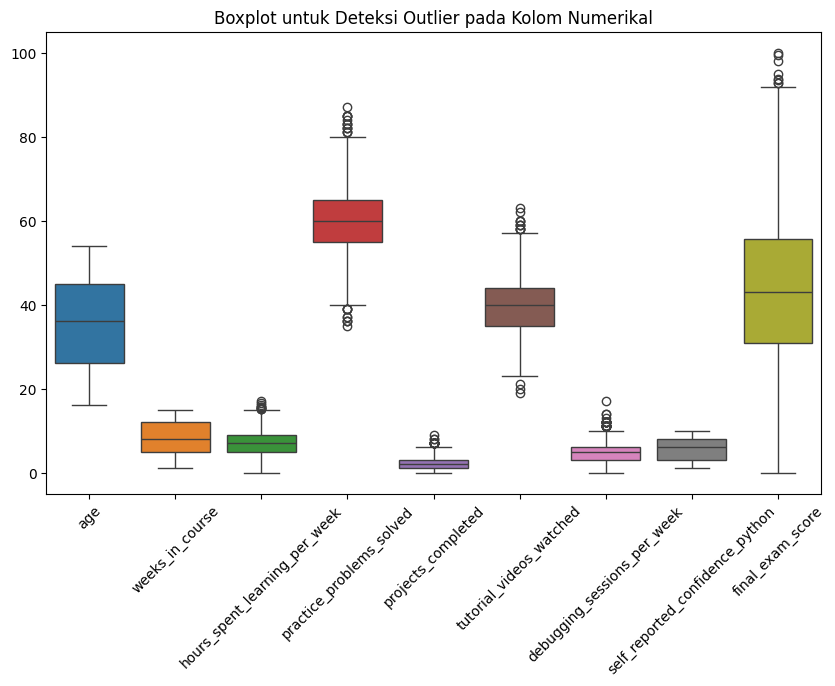

In [16]:
# visualisasi outlier dengan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_raw[numeric_cols])
plt.title('Boxplot untuk Deteksi Outlier pada Kolom Numerikal')
plt.xticks(rotation=45)
plt.show()

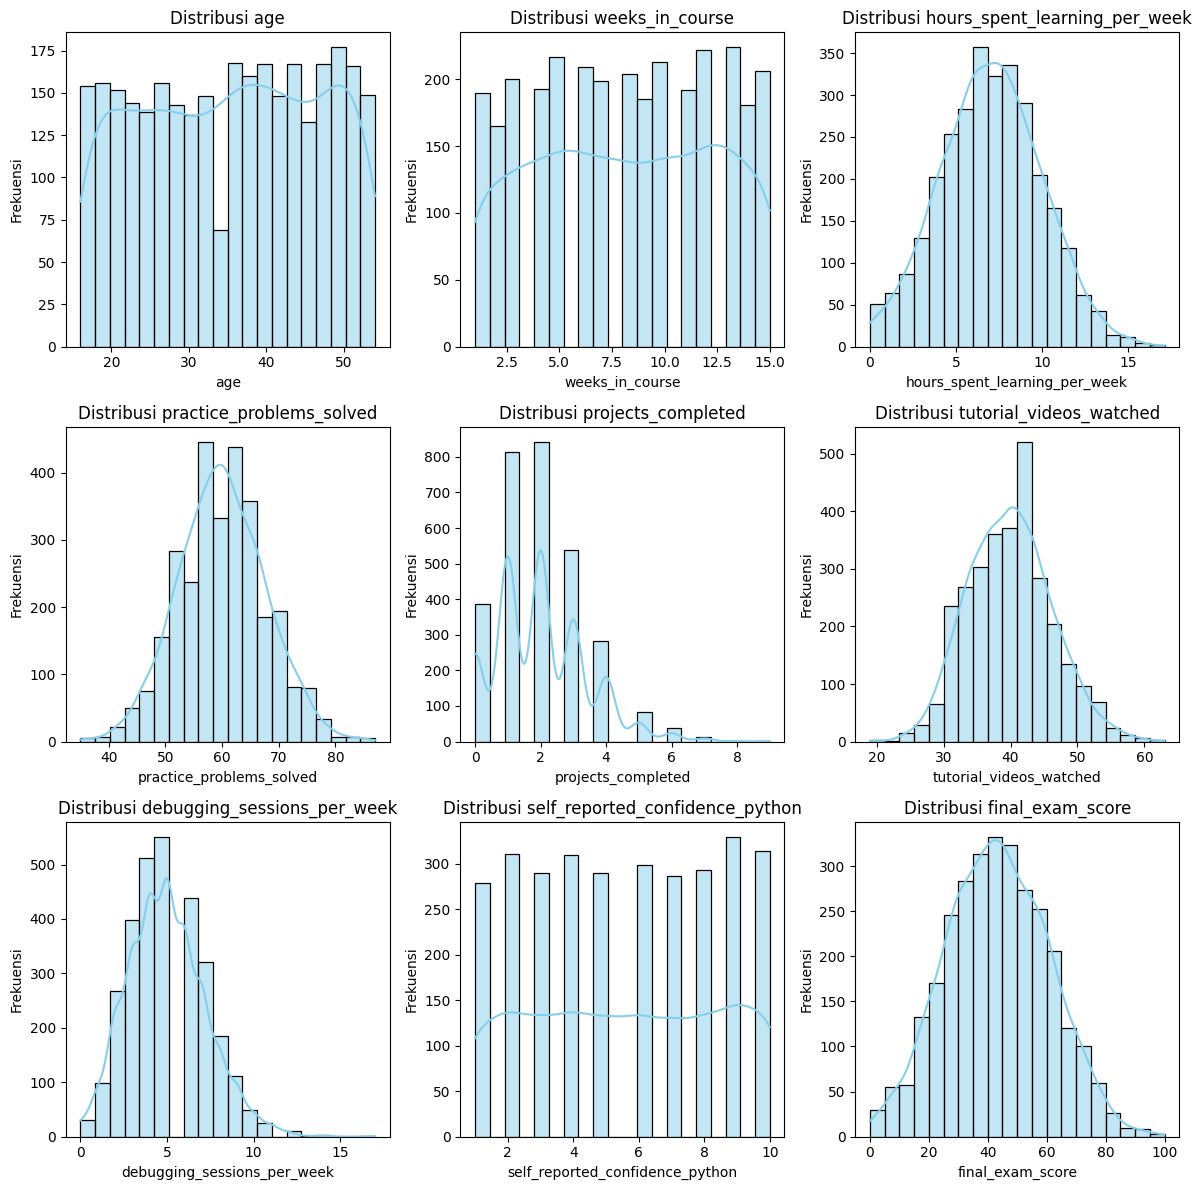

In [17]:
# visualisasi histogram untuk distribusi data
plt.figure(figsize=(12, 12))

for i, col in enumerate(numeric_cols):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_raw[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribusi {col}')
    plt.xlabel(col)
    plt.ylabel('Frekuensi')

plt.tight_layout()
plt.show()

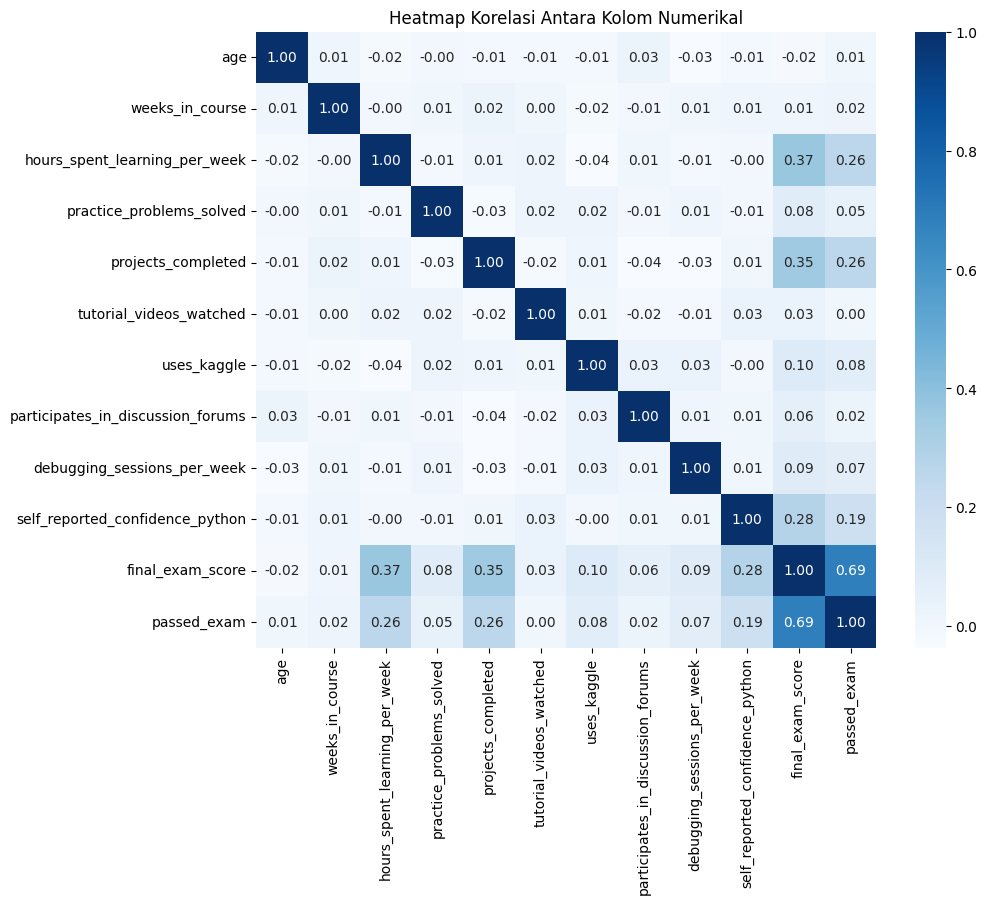

In [18]:
# visualisasi heatmap korelasi
corr_col = df_raw.select_dtypes(include=['float64', 'int64']).drop(columns=['student_id']).columns
plt.figure(figsize=(10, 8))
correlation_matrix = df_raw[corr_col].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Heatmap Korelasi Antara Kolom Numerikal')
plt.show()

Dari heatmap korelasi diatas dapat disimpulkan bahwa :
1. Hasil skor final ujian dan hasil kelulusan itu sangat dipengaruhi oleh total jam belajar per minggu, total proyek yang terselesaikan, dan skor kepercayaan diri murid dalam menguasai Python.
2. Tapi dari semua itu, korelasi yang paling kuat adalah antara skor ujian dengan hasil kelulusan. Artinya, semakin tinggi nilai murid, semakin tinggi juga kemungkinan ia lulus.

# **5. Data Preprocessing**

Catatan : Outlier disini tidak akan dihapus dengan pertimbangan agar model bisa memprediksi juga kasus-kasus diluar rentang. Jadi data tidak terlalu bersih. Penanganannya dengan menggunakan Robust Scaling dibandingkan MinMaxScaler atau Normalization dengan keunggulannya yang tidak sensitif outlier dan tetap bisa memakai outlier untuk pelatihan model.

In [19]:
# split sebelum preprocessing
X = df_raw.drop(columns=['student_id', 'passed_exam'])
y = df_raw['passed_exam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [20]:
# pemilihan fitur numerikal dan kategorikal
# kolom student_id dihapus karena identifier dan kolom passed_exam dihapus karena sebagai target variabel
numeric_features = df_raw.select_dtypes(include=['float64', 'int64']).drop(columns=['student_id', 'passed_exam']).columns
categorical_features = df_raw.select_dtypes(include=['object']).columns

In [21]:
# mengatasi missing value fitur numerik
num_median = X_train[numeric_features].median()
X_train[numeric_features] = X_train[numeric_features].fillna(num_median)
X_test[numeric_features] = X_test[numeric_features].fillna(num_median)

In [22]:
# mengatasi missing value fitur kategorikal
cat_modus = X_train[categorical_features].mode().iloc[0]
X_train[categorical_features] = X_train[categorical_features].fillna(cat_modus)
X_test[categorical_features] = X_test[categorical_features].fillna(cat_modus)

X_train.isnull().sum()

age                                  0
country                              0
prior_programming_experience         0
weeks_in_course                      0
hours_spent_learning_per_week        0
practice_problems_solved             0
projects_completed                   0
tutorial_videos_watched              0
uses_kaggle                          0
participates_in_discussion_forums    0
debugging_sessions_per_week          0
self_reported_confidence_python      0
final_exam_score                     0
dtype: int64

In [23]:
# encode fitur kategorikal
X_train_encoded = pd.get_dummies(X_train, columns=categorical_features, drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=categorical_features, drop_first=True)

# memastikan kolom yang sama pada train dan test setelah encoding
X_test_encoded = X_test_encoded.reindex(columns=X_train_encoded.columns, fill_value=0)

X_train_encoded.head()

,age,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,...,country_Germany,country_India,country_Indonesia,country_Nigeria,country_Other,country_Pakistan,country_UK,country_USA,prior_programming_experience_Beginner,prior_programming_experience_Intermediate
899,40,7,6.9,59,2,38,1,0,7,3,...,False,True,False,False,False,False,False,False,False,False
770,40,3,6.0,70,3,38,0,0,3,8,...,False,False,False,False,False,False,False,True,False,True
1848,28,10,5.8,71,1,43,0,1,6,4,...,False,False,False,True,False,False,False,False,False,True
1509,22,10,9.0,55,5,40,0,1,4,10,...,False,False,True,False,False,False,False,False,True,False
2642,26,5,5.6,58,5,49,0,1,4,7,...,False,False,False,False,False,False,True,False,True,False


In [24]:
# scaling fitur numerikal dengan RobustScaler
scaler = RobustScaler()
X_train_encoded[numeric_features] = scaler.fit_transform(X_train_encoded[numeric_features])
X_test_encoded[numeric_features] = scaler.transform(X_test_encoded[numeric_features])

display(X_train_encoded.head())
display(X_test_encoded.head())

,age,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,...,country_Germany,country_India,country_Indonesia,country_Nigeria,country_Other,country_Pakistan,country_UK,country_USA,prior_programming_experience_Beginner,prior_programming_experience_Intermediate
899,0.210526,-0.137931,-0.025,-0.1,0.0,-0.250,1.0,0.0,0.666667,-0.4,...,False,True,False,False,False,False,False,False,False,False
770,0.210526,-0.689655,-0.250,1.0,0.5,-0.250,0.0,0.0,-0.666667,0.6,...,False,False,False,False,False,False,False,True,False,True
1848,-0.421053,0.275862,-0.300,1.1,-0.5,0.375,0.0,1.0,0.333333,-0.2,...,False,False,False,True,False,False,False,False,False,True
1509,-0.736842,0.275862,0.500,-0.5,1.5,0.000,0.0,1.0,-0.333333,1.0,...,False,False,True,False,False,False,False,False,True,False
2642,-0.526316,-0.413793,-0.350,-0.2,1.5,1.125,0.0,1.0,-0.333333,0.4,...,False,False,False,False,False,False,True,False,True,False


,age,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,...,country_Germany,country_India,country_Indonesia,country_Nigeria,country_Other,country_Pakistan,country_UK,country_USA,prior_programming_experience_Beginner,prior_programming_experience_Intermediate
1169,0.736842,-0.275862,-1.200,0.7,-1.0,-0.875,0.0,1.0,-0.333333,-0.2,...,False,True,False,False,False,False,False,False,True,False
1928,-0.421053,0.827586,0.625,0.7,0.5,-0.375,1.0,1.0,1.333333,1.0,...,False,False,True,False,False,False,False,False,True,False
687,-0.842105,0.965517,1.550,0.1,0.5,0.875,0.0,1.0,-1.000000,0.0,...,False,False,False,False,False,False,False,True,False,True
943,0.315789,0.689655,-0.475,0.0,-1.0,-1.000,0.0,0.0,0.000000,0.6,...,False,False,False,False,False,False,False,False,True,False
1274,0.578947,-0.413793,-0.900,-0.4,-1.0,-0.625,0.0,0.0,0.000000,0.6,...,False,True,False,False,False,False,False,False,True,False


In [25]:
# menggabungkan kembali X dan y untuk eksport file csv
df_preprocessed = X_train_encoded.copy()
df_preprocessed['passed_exam'] = y_train.values

df_preprocessed.head()

,age,weeks_in_course,hours_spent_learning_per_week,practice_problems_solved,projects_completed,tutorial_videos_watched,uses_kaggle,participates_in_discussion_forums,debugging_sessions_per_week,self_reported_confidence_python,...,country_India,country_Indonesia,country_Nigeria,country_Other,country_Pakistan,country_UK,country_USA,prior_programming_experience_Beginner,prior_programming_experience_Intermediate,passed_exam
899,0.210526,-0.137931,-0.025,-0.1,0.0,-0.250,1.0,0.0,0.666667,-0.4,...,True,False,False,False,False,False,False,False,False,0
770,0.210526,-0.689655,-0.250,1.0,0.5,-0.250,0.0,0.0,-0.666667,0.6,...,False,False,False,False,False,False,True,False,True,1
1848,-0.421053,0.275862,-0.300,1.1,-0.5,0.375,0.0,1.0,0.333333,-0.2,...,False,False,True,False,False,False,False,False,True,0
1509,-0.736842,0.275862,0.500,-0.5,1.5,0.000,0.0,1.0,-0.333333,1.0,...,False,True,False,False,False,False,False,True,False,0
2642,-0.526316,-0.413793,-0.350,-0.2,1.5,1.125,0.0,1.0,-0.333333,0.4,...,False,False,False,False,False,True,False,True,False,0


In [26]:
# eksport ke csv
df_preprocessed.to_csv('python-learning-performance_preprocessing.csv', index=False)